In [1]:
pip install cryptocompare


  Preparing metadata (setup.py) ... done
  Created wheel for cryptocompare: filename=cryptocompare-0.7.6-py3-none-any.whl size=6290 sha256=bdaface9589a436c0a0a22295822274e0dfd2618bc302ac14756cb8406fa9054
  Stored in directory: /root/.cache/pip/wheels/97/81/6a/261bc499b9d9bf8b391eea52c90a4746b477539564b0a66c94
Successfully built cryptocompare


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

from datetime import datetime, timedelta
import cryptocompare

In [3]:
# Set up End and Start times for data grab
end = datetime.now()
start = end - timedelta(days=365)

In [4]:
# Fetch Bitcoin historical data
btc_data = cryptocompare.get_historical_price_day('BTC', currency='USD', limit=365)

In [30]:
# Fetch Bitcoin historical data
btc_data = cryptocompare.get_historical_price_day('BTC', currency='USD', limit=365)

# Convert to DataFrame
btc_df = pd.DataFrame(btc_data)

# Convert timestamp to datetime
btc_df['time'] = pd.to_datetime(btc_df['time'], unit='s')

# Set datetime as index
# btc_df.set_index('time', inplace=True)

btc_df.tail(10)

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
356,2024-06-30,62949.76,60637.50,60905.30,12626.61,7.787656e+08,62685.88,direct,
357,2024-07-01,63800.98,62462.20,62685.88,25708.72,1.623105e+09,62841.27,direct,
358,2024-07-02,63219.74,61453.08,62841.27,20510.77,1.278702e+09,62044.48,direct,
359,2024-07-03,62198.73,59373.07,62044.48,27365.92,1.653064e+09,60157.20,direct,
360,2024-07-04,60428.43,56728.63,60157.20,40351.82,2.342237e+09,57041.11,direct,
361,2024-07-05,57494.97,53528.09,57041.11,57490.15,3.198812e+09,56646.24,direct,
362,2024-07-06,58495.08,56035.03,56646.24,18766.95,1.072780e+09,58255.65,direct,
363,2024-07-07,58452.39,55734.13,58255.65,18402.28,1.053256e+09,55866.60,direct,
364,2024-07-08,58166.93,54305.08,55866.60,43439.51,2.441024e+09,56709.76,direct,
365,2024-07-09,57877.10,56296.10,56709.76,14181.97,8.116436e+08,57138.28,direct,


In [6]:
print('Total number of days present in the dataset: ',btc_df.shape[0])
print('Total number of fields present in the dataset: ',btc_df.shape[1])

Total number of days present in the dataset:  366
Total number of fields present in the dataset:  8


In [7]:
btc_df.shape

(366, 8)

In [29]:
btc_df.head()
print(btc_df.columns)

Index(['high', 'low', 'open', 'volumefrom', 'volumeto', 'close',
       'conversionType', 'conversionSymbol'],
      dtype='object')


In [9]:
btc_df.tail()

,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
time,,,,,,,,
2024-07-05,57494.97,53528.09,57041.11,57490.15,3.198812e+09,56646.24,direct,
2024-07-06,58495.08,56035.03,56646.24,18766.95,1.072780e+09,58255.65,direct,
2024-07-07,58452.39,55734.13,58255.65,18402.28,1.053256e+09,55866.60,direct,
2024-07-08,58166.93,54305.08,55866.60,43439.51,2.441024e+09,56709.76,direct,
2024-07-09,57877.10,56296.10,56709.76,13903.50,7.957333e+08,57213.74,direct,


In [10]:
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2023-07-10 to 2024-07-09
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   high              366 non-null    float64
 1   low               366 non-null    float64
 2   open              366 non-null    float64
 3   volumefrom        366 non-null    float64
 4   volumeto          366 non-null    float64
 5   close             366 non-null    float64
 6   conversionType    366 non-null    object 
 7   conversionSymbol  366 non-null    object 
dtypes: float64(6), object(2)
memory usage: 25.7+ KB


In [11]:
btc_df.describe()

,high,low,open,volumefrom,volumeto,close
count,366.000000,366.000000,366.000000,366.000000,3.660000e+02,366.000000
mean,47343.892787,45553.775219,46453.615601,27069.855437,1.319886e+09,46527.501530
std,16393.379763,15506.737968,15996.792182,17763.153904,1.087752e+09,15983.828391
min,25878.610000,24911.780000,25157.070000,3495.960000,9.302473e+07,25157.070000
25%,30235.260000,29592.270000,29875.707500,14783.607500,5.233405e+08,29875.707500
50%,43649.670000,42179.980000,42971.580000,23974.220000,1.049666e+09,43011.320000
75%,64610.607500,62114.477500,63690.772500,34443.610000,1.750295e+09,63690.772500
max,73802.640000,71329.700000,73118.090000,126873.130000,8.263898e+09,73118.090000


In [12]:
print('Null Values:',btc_df.isnull().values.sum())

Null Values: 0


In [13]:
print('NA values:',btc_df.isnull().values.any())

NA values: False


In [14]:
# Final shape of the dataset after dealing with null values

btc_df.shape

(366, 8)

In [15]:
# Printing the start date and end date of the dataset
start_date = btc_df.index[0]
end_date = btc_df.index[-1]

print('Starting date:', start_date)
print('Ending date:', end_date)

Starting date: 2023-07-10 00:00:00
Ending date: 2024-07-09 00:00:00


In [31]:
# Verify the column names in your DataFrame
print(btc_df.columns)

# Assuming your columns are named differently,
# adjust the column names in the groupby operation accordingly.
# For example, if your columns are 'open' and 'close', use:



Index(['time', 'high', 'low', 'open', 'volumefrom', 'volumeto', 'close',
       'conversionType', 'conversionSymbol'],
      dtype='object')


In [32]:
monthvise= btc_df.groupby(btc_df['time'].dt.strftime('%B'))[['open','close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,open,close
time,,
January,42910.420323,42919.289355
February,49232.814138,49875.038276
March,67368.745161,67695.626774
April,66249.421000,65893.456333
May,65048.642258,65269.554516
June,66061.197667,65901.318667
July,38408.715484,38199.437419
August,27961.293548,27855.029677
September,26273.909000,26308.141667


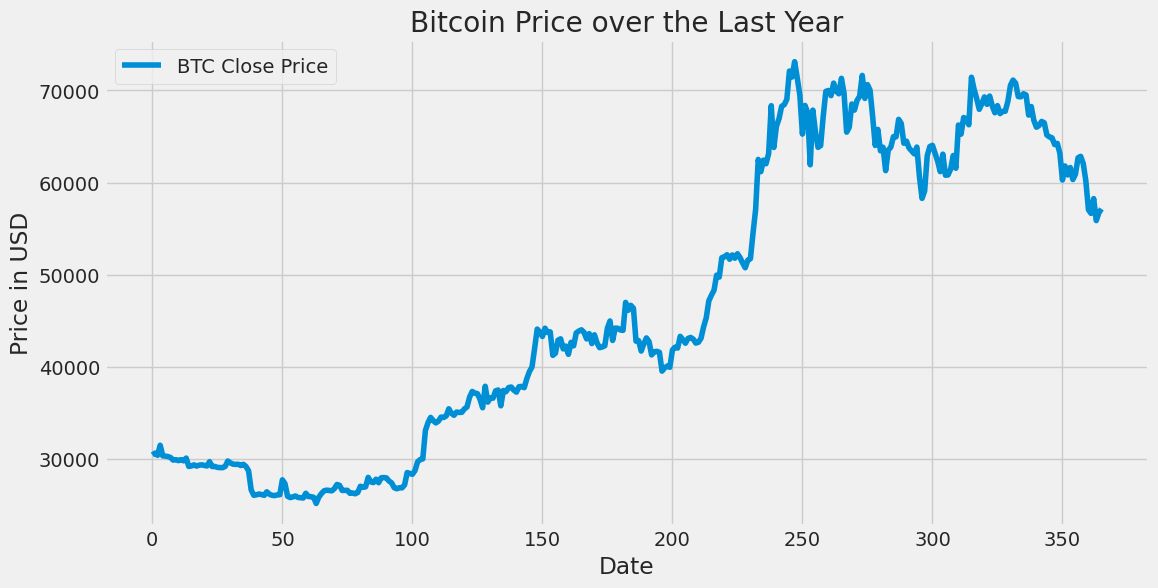

In [33]:
# Plotting the Bitcoin price data
plt.figure(figsize=(12, 6))
plt.plot(btc_df.index, btc_df['close'], label='BTC Close Price')
plt.title('Bitcoin Price over the Last Year')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend()
plt.show()


In [35]:
import plotly.graph_objects as go

In [36]:
# Create the bar plot
fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise.index.astype(str),
    y=monthvise['open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index.astype(str),
    y=monthvise['close'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise Comparison between Bitcoin Open and Close Price')
fig.show()

#Build and Train the LSTM Model

In [37]:
from sklearn.preprocessing import MinMaxScaler

# Prepare the data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(btc_df['close'].values.reshape(-1, 1))

# Create training and test datasets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [38]:
# Create a function to prepare the data in a format suitable for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)


# Reshape the data to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Predicting the Bitcoin prices
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Transforming the data back to the original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

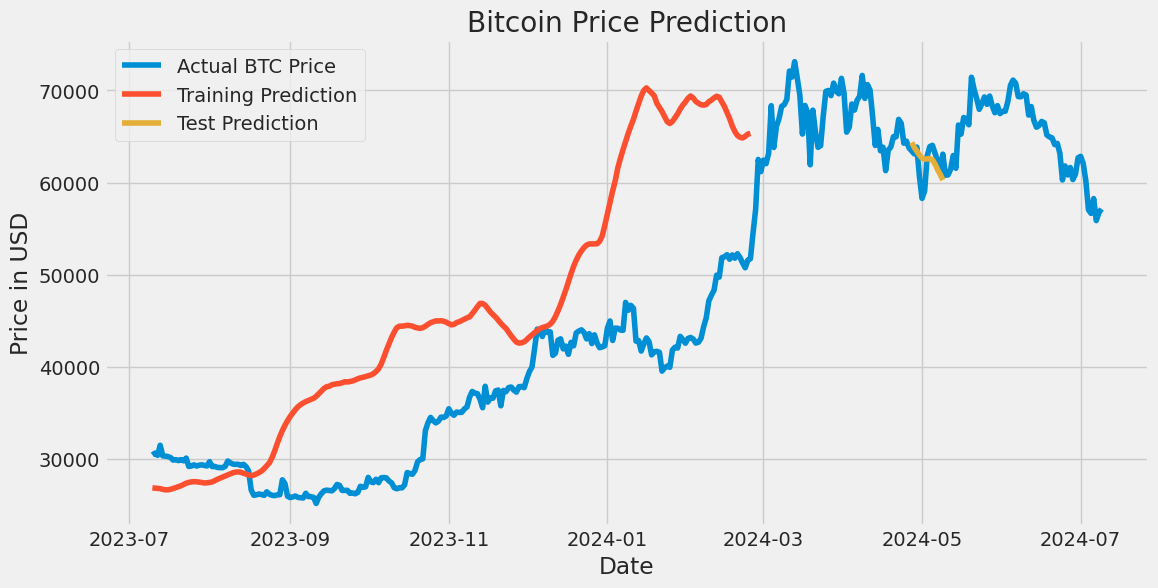

In [45]:
# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(btc_df['time'], btc_df['close'], label='Actual BTC Price')

# Adjust the training index to match the length of train_predict
train_index = btc_df['time'][:len(train_predict)]

# Adjust the test index to start where train_predict ends
test_index = btc_df['time'][len(train_predict) + time_step + 1 : len(train_predict) + time_step + 1 + len(test_predict)]

plt.plot(train_index, train_predict.flatten(), label='Training Prediction')  # Flatten train_predict to 1D
plt.plot(test_index, test_predict.flatten(), label='Test Prediction')  # Flatten test_predict to 1D
plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend()
plt.show()

Epoch 1/50
8/8 [==============================] - 1s 63ms/step - loss: 0.0048
Epoch 2/50
8/8 [==============================] - 1s 72ms/step - loss: 0.0041
Epoch 3/50
8/8 [==============================] - 1s 67ms/step - loss: 0.0051
Epoch 4/50
8/8 [==============================] - 0s 62ms/step - loss: 0.0037
Epoch 5/50
8/8 [==============================] - 1s 64ms/step - loss: 0.0038
Epoch 6/50
8/8 [==============================] - 1s 63ms/step - loss: 0.0037
Epoch 7/50
8/8 [==============================] - 0s 57ms/step - loss: 0.0042
Epoch 8/50
8/8 [==============================] - 0s 55ms/step - loss: 0.0042
Epoch 9/50
8/8 [==============================] - 0s 55ms/step - loss: 0.0033
Epoch 10/50
8/8 [==============================] - 0s 52ms/step - loss: 0.0041
Epoch 11/50
8/8 [==============================] - 0s 56ms/step - loss: 0.0039
Epoch 12/50
8/8 [==============================] - 0s 58ms/step - loss: 0.0040
Epoch 13/50
8/8 [==============================] - 0s 55ms/st

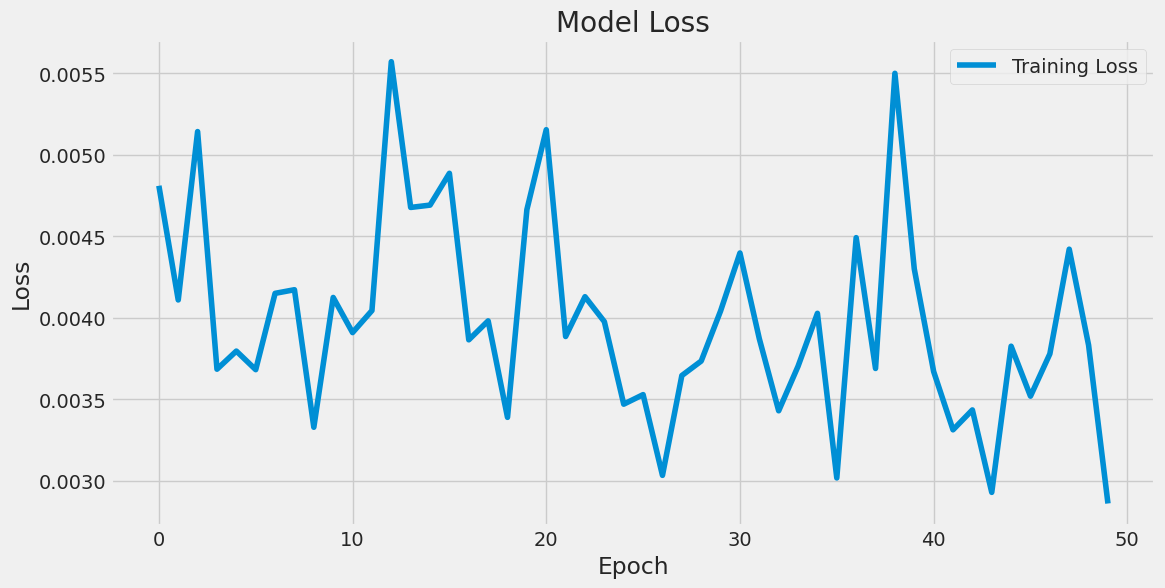

In [46]:
# Train the model and store the training history
history = model.fit(X_train, y_train, epochs=50, batch_size=32)

# Plot the training loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss') # Access the loss from the history object
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

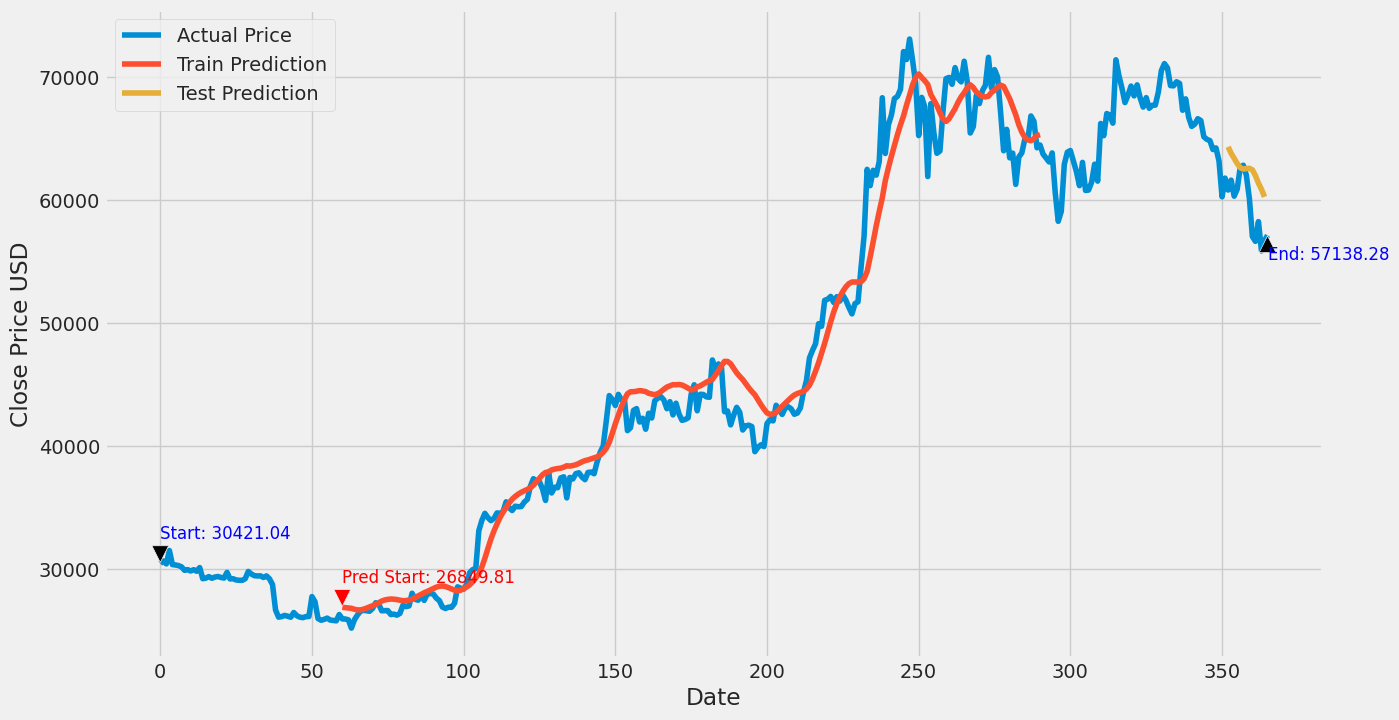

In [47]:
# Reassign variables for annotations
actual_start_price = scaler.inverse_transform(scaled_data)[0, 0]
actual_end_price = scaler.inverse_transform(scaled_data)[-1, 0]
predicted_start_price = train_predict[0, 0]
predicted_end_price = test_predict[-1, 0]

# Create empty arrays for plotting predictions
train_predict_plot = np.empty_like(scaled_data)
train_predict_plot[:, :] = np.nan
train_predict_plot[time_step:len(train_predict) + time_step, :] = train_predict

test_predict_plot = np.empty_like(scaled_data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (time_step * 2) + 1:len(scaled_data) - 1, :] = test_predict

# Plot baseline and predictions
plt.figure(figsize=(14, 8))
plt.plot(scaler.inverse_transform(scaled_data), label='Actual Price')
plt.plot(train_predict_plot, label='Train Prediction')
plt.plot(test_predict_plot, label='Test Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price USD')

# Annotate the start and end prices
plt.annotate(f'Start: {actual_start_price:.2f}', xy=(0, actual_start_price), xytext=(0, actual_start_price + 2000),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12, color='blue')
plt.annotate(f'End: {actual_end_price:.2f}', xy=(len(scaled_data) - 1, actual_end_price), xytext=(len(scaled_data) - 1, actual_end_price - 2000),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12, color='blue')
plt.annotate(f'Pred Start: {predicted_start_price:.2f}', xy=(time_step, predicted_start_price), xytext=(time_step, predicted_start_price + 2000),
             arrowprops=dict(facecolor='red', shrink=0.05), fontsize=12, color='red')
plt.annotate(f'Pred End: {predicted_end_price:.2f}', xy=(len(train_predict_plot) + len(test_predict_plot) - time_step - 1, predicted_end_price),
             xytext=(len(train_predict_plot) + len(test_predict_plot) - time_step - 1, predicted_end_price - 2000),
             arrowprops=dict(facecolor='red', shrink=0.05), fontsize=12, color='red')

plt.legend()
plt.show()


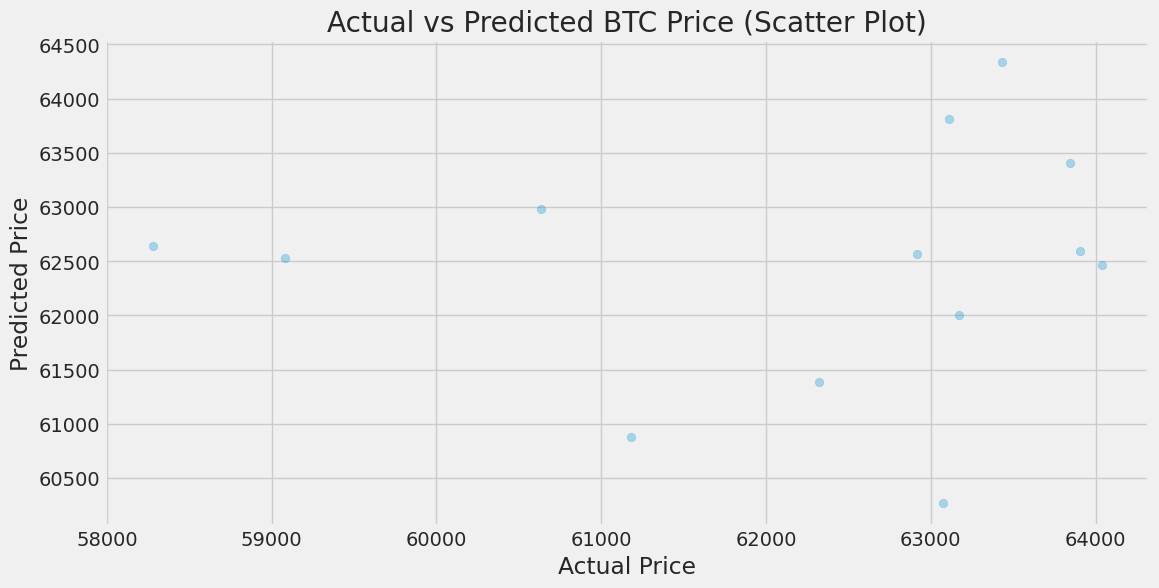

In [49]:
# Scatter plot for actual vs predicted values
plt.figure(figsize=(12, 6))
plt.scatter(btc_df['close'][len(train_predict) + time_step + 1 : len(train_predict) + time_step + 1 + len(test_predict)], test_predict.flatten(), alpha=0.3)
plt.title('Actual vs Predicted BTC Price (Scatter Plot)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

Train RMSE: 47774.29711989016
Test RMSE: 62460.39815312109
Actual Prices: [30421.04, 57138.280000000006]
Predicted Prices: [26849.812, 60266.418]


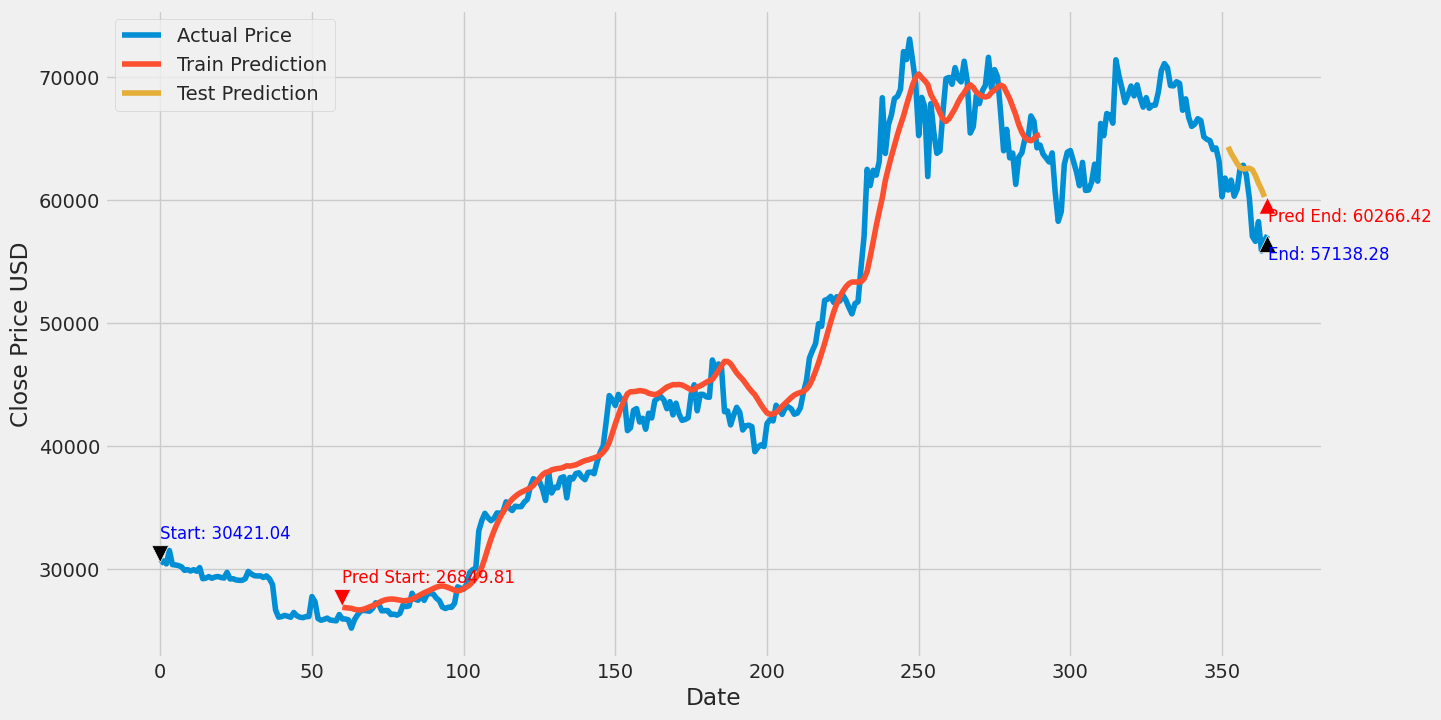

In [51]:
import math
from sklearn.metrics import mean_squared_error

# Calculate RMSE
train_rmse = math.sqrt(mean_squared_error(y_train, train_predict))
test_rmse = math.sqrt(mean_squared_error(y_test, test_predict))

print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

# Get the actual start and end prices
actual_start_price = scaler.inverse_transform([scaled_data[0]])[0][0]
actual_end_price = scaler.inverse_transform([scaled_data[-1]])[0][0]

# Get the predicted start and end prices
predicted_start_price = train_predict[0][0] if len(train_predict) > 0 else test_predict[0][0]
predicted_end_price = test_predict[-1][0] if len(test_predict) > 0 else train_predict[-1][0]

# Create lists of start and end prices
actual_prices = [actual_start_price, actual_end_price]
predicted_prices = [predicted_start_price, predicted_end_price]

# Print the lists
print(f'Actual Prices: {actual_prices}')
print(f'Predicted Prices: {predicted_prices}')

# Prepare data for plotting
train_predict_plot = np.empty_like(scaled_data)
train_predict_plot[:, :] = np.nan
train_predict_plot[time_step:len(train_predict) + time_step, :] = train_predict

test_predict_plot = np.empty_like(scaled_data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (time_step * 2) + 1:len(scaled_data) - 1, :] = test_predict

# Plot baseline and predictions
plt.figure(figsize=(14, 8))
plt.plot(scaler.inverse_transform(scaled_data), label='Actual Price')
plt.plot(train_predict_plot, label='Train Prediction')
plt.plot(test_predict_plot, label='Test Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price USD')

# Annotate the start and end prices
plt.annotate(f'Start: {actual_start_price:.2f}', xy=(0, actual_start_price), xytext=(0, actual_start_price + 2000),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12, color='blue')
plt.annotate(f'End: {actual_end_price:.2f}', xy=(len(scaled_data) - 1, actual_end_price), xytext=(len(scaled_data) - 1, actual_end_price - 2000),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12, color='blue')
plt.annotate(f'Pred Start: {predicted_start_price:.2f}', xy=(time_step, predicted_start_price), xytext=(time_step, predicted_start_price + 2000),
             arrowprops=dict(facecolor='red', shrink=0.05), fontsize=12, color='red')
plt.annotate(f'Pred End: {predicted_end_price:.2f}', xy=(len(scaled_data) - 1, predicted_end_price), xytext=(len(scaled_data) - 1, predicted_end_price - 2000),
             arrowprops=dict(facecolor='red', shrink=0.05), fontsize=12, color='red')

plt.legend()
plt.show()

#Build and Train the Random Forest Model

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Assuming btc_df is already defined and contains the Bitcoin price data

# Use only the 'close' price for simplicity
data = btc_df[['close']]

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Creating a dataset for the model
def create_dataset(dataset, time_step=1):
    X, y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        X.append(a)
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 100
X, y = create_dataset(scaled_data, time_step)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1])

In [53]:
from sklearn.ensemble import RandomForestRegressor

# Build the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
train_predict = rf_model.predict(X_train)
test_predict = rf_model.predict(X_test)

# Transform back to original form
train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))

# Calculate RMSE
import math
from sklearn.metrics import mean_squared_error
train_rmse = math.sqrt(mean_squared_error(y_train, scaler.inverse_transform(y_train.reshape(-1, 1))))
test_rmse = math.sqrt(mean_squared_error(y_test, scaler.inverse_transform(y_test.reshape(-1, 1))))

print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')


Train RMSE: 55579.521259562265
Test RMSE: 53186.865851720584


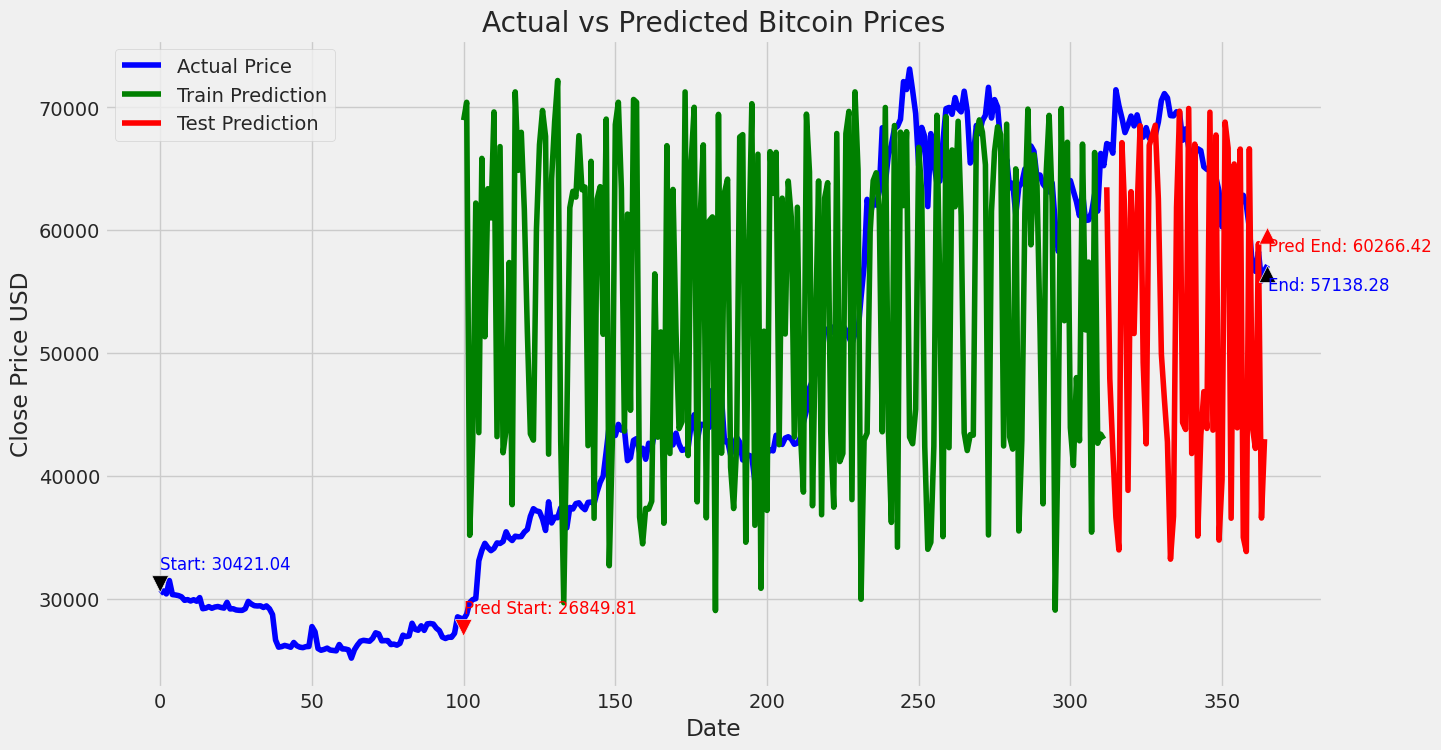

In [54]:
# Prepare data for plotting
train_predict_plot = np.empty_like(scaled_data)
train_predict_plot[:, :] = np.nan
train_predict_plot[time_step:len(train_predict) + time_step, 0] = train_predict.flatten()

test_predict_plot = np.empty_like(scaled_data)
test_predict_plot[:, :] = np.nan

# Adjust the start index to ensure a non-empty slice
start_index = len(train_predict) + time_step
end_index = len(scaled_data) - 1
test_predict_plot[start_index:end_index, 0] = test_predict[:(end_index - start_index), 0]

plt.figure(figsize=(14, 8))
plt.plot(scaler.inverse_transform(scaled_data), label='Actual Price', color='blue')
plt.plot(train_predict_plot, label='Train Prediction', color='green')
plt.plot(test_predict_plot, label='Test Prediction', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.title('Actual vs Predicted Bitcoin Prices')
plt.legend()

# Annotate the start and end prices
plt.annotate(f'Start: {actual_start_price:.2f}', xy=(0, actual_start_price), xytext=(0, actual_start_price + 2000),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12, color='blue')
plt.annotate(f'End: {actual_end_price:.2f}', xy=(len(scaled_data) - 1, actual_end_price), xytext=(len(scaled_data) - 1, actual_end_price - 2000),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12, color='blue')
plt.annotate(f'Pred Start: {predicted_start_price:.2f}', xy=(time_step, predicted_start_price), xytext=(time_step, predicted_start_price + 2000),
             arrowprops=dict(facecolor='red', shrink=0.05), fontsize=12, color='red')
plt.annotate(f'Pred End: {predicted_end_price:.2f}', xy=(end_index, predicted_end_price), xytext=(end_index, predicted_end_price - 2000),
             arrowprops=dict(facecolor='red', shrink=0.05), fontsize=12, color='red')

plt.show()

In [55]:
# Get the actual start and end prices
actual_start_price = scaler.inverse_transform([scaled_data[0]])[0][0]
actual_end_price = scaler.inverse_transform([scaled_data[-1]])[0][0]

# Get the predicted start and end prices
predicted_start_price = train_predict[0][0] if len(train_predict) > 0 else test_predict[0][0]
predicted_end_price = test_predict[-1][0] if len(test_predict) > 0 else train_predict[-1][0]

# Create lists of start and end prices
actual_prices = [actual_start_price, actual_end_price]
predicted_prices = [predicted_start_price, predicted_end_price]

# Print the lists
print(f'Actual Prices: {actual_prices}')
print(f'Predicted Prices: {predicted_prices}')

Actual Prices: [30421.04, 57138.280000000006]
Predicted Prices: [68953.9024000001, 42985.60340000001]


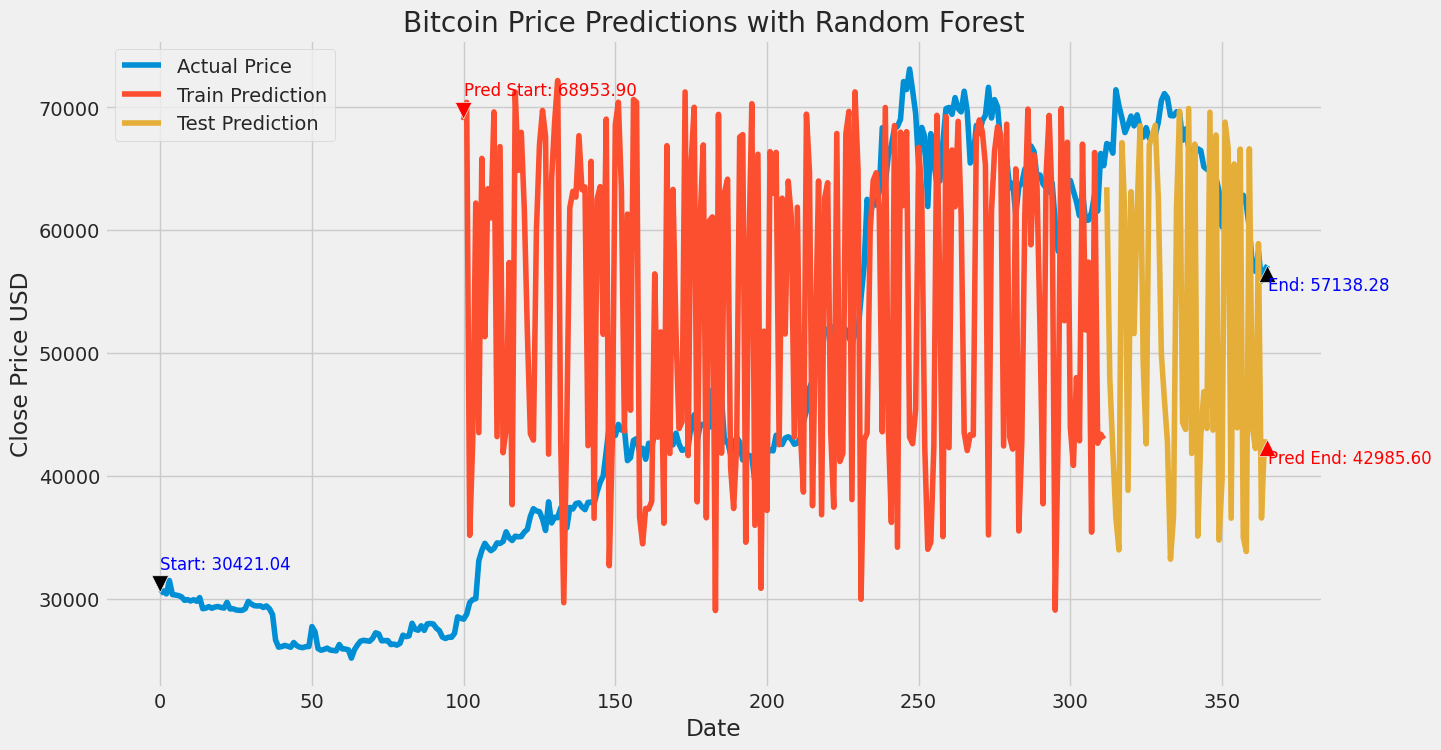

In [56]:
# Annotate the start and end prices
plt.figure(figsize=(14, 8))
plt.plot(scaler.inverse_transform(scaled_data), label='Actual Price')
plt.plot(train_predict_plot, label='Train Prediction')
plt.plot(test_predict_plot, label='Test Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price USD')

plt.annotate(f'Start: {actual_start_price:.2f}', xy=(0, actual_start_price), xytext=(0, actual_start_price + 2000),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12, color='blue')
plt.annotate(f'End: {actual_end_price:.2f}', xy=(len(scaled_data) - 1, actual_end_price), xytext=(len(scaled_data) - 1, actual_end_price - 2000),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12, color='blue')
plt.annotate(f'Pred Start: {predicted_start_price:.2f}', xy=(time_step, predicted_start_price), xytext=(time_step, predicted_start_price + 2000),
             arrowprops=dict(facecolor='red', shrink=0.05), fontsize=12, color='red')
plt.annotate(f'Pred End: {predicted_end_price:.2f}', xy=(len(scaled_data) - 1, predicted_end_price), xytext=(len(scaled_data) - 1, predicted_end_price - 2000),
             arrowprops=dict(facecolor='red', shrink=0.05), fontsize=12, color='red')

plt.legend()
plt.title('Bitcoin Price Predictions with Random Forest')
plt.show()